In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [3]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y.columns = ['Targets']
model = KMeans(n_clusters = 3)
model.fit(X)


d:\software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

Text(0, 0.5, 'Petal Width')

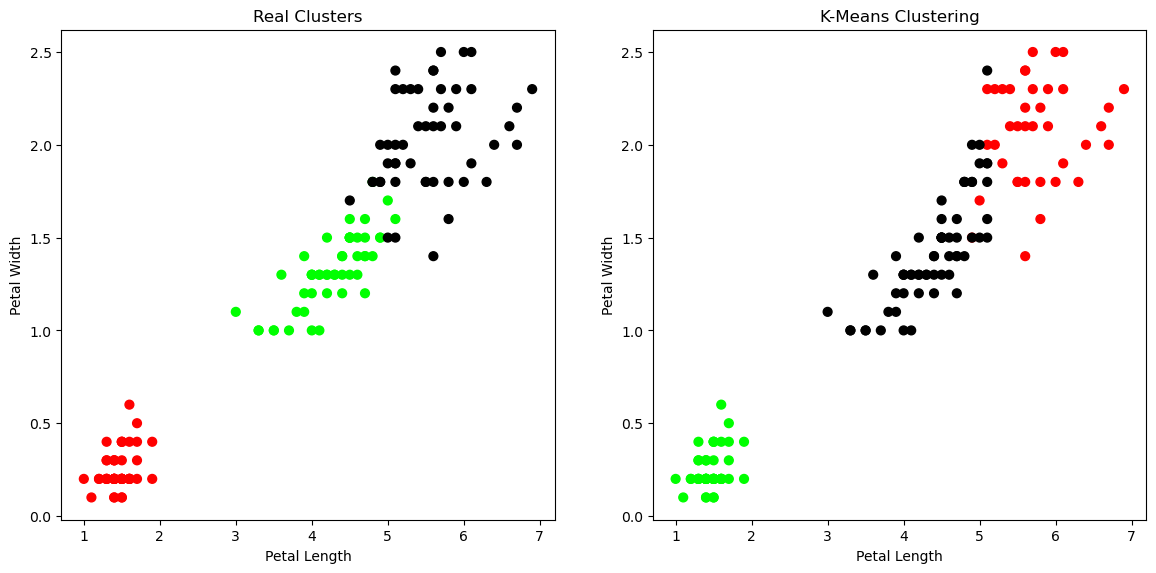

In [4]:
plt.figure(figsize = (14, 14))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[y.Targets], s = 40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[model.labels_], s = 40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


In [5]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)


d:\software\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Observation: The GMM Using EM Algorithm Based Clustering Matched The True Labels More Closely Than The K-Means.


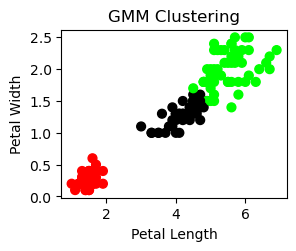

In [6]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[gmm_y], s = 40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('Observation: The GMM Using EM Algorithm Based Clustering Matched The True Labels More Closely Than The K-Means.')
